### Imports  

In [1]:
from Utils import *

### NPZ to DF and sono visualizations

In [2]:
#dfs creation from npz
folder_path = r"C:\Users\stebi\Desktop\potatoes\1800"
dataframes = load_npz_files(folder_path)
for name, df in dataframes.items():
    globals()[name] = df

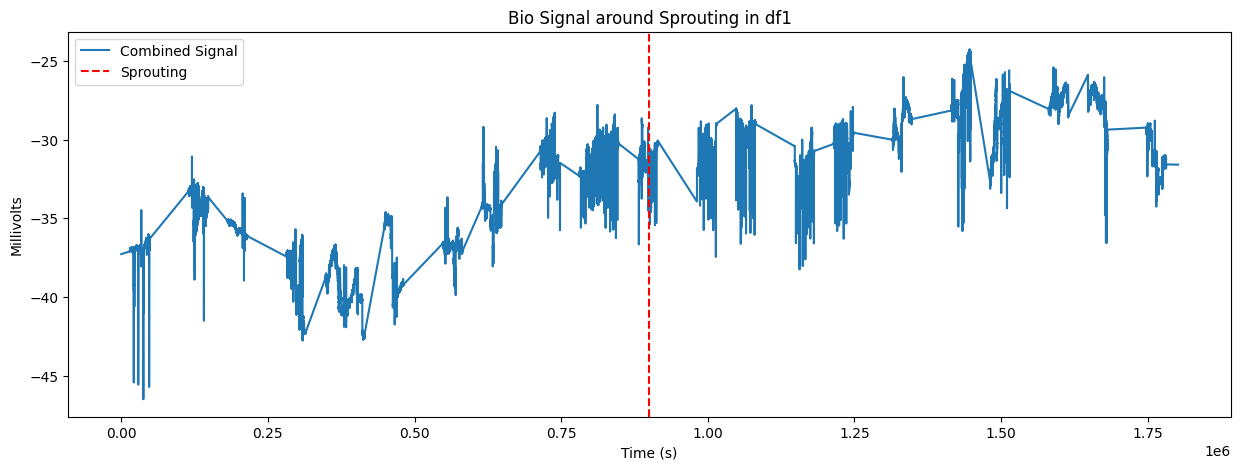

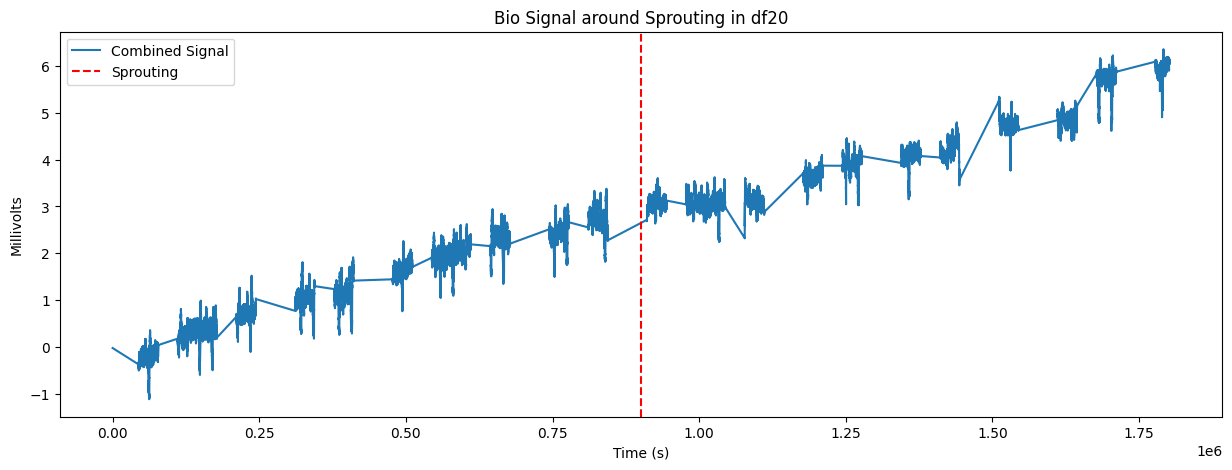

In [3]:
#before and after the sprouting
plot_bio_signal(df1, 'df1')
plot_bio_signal(df20, 'df20')

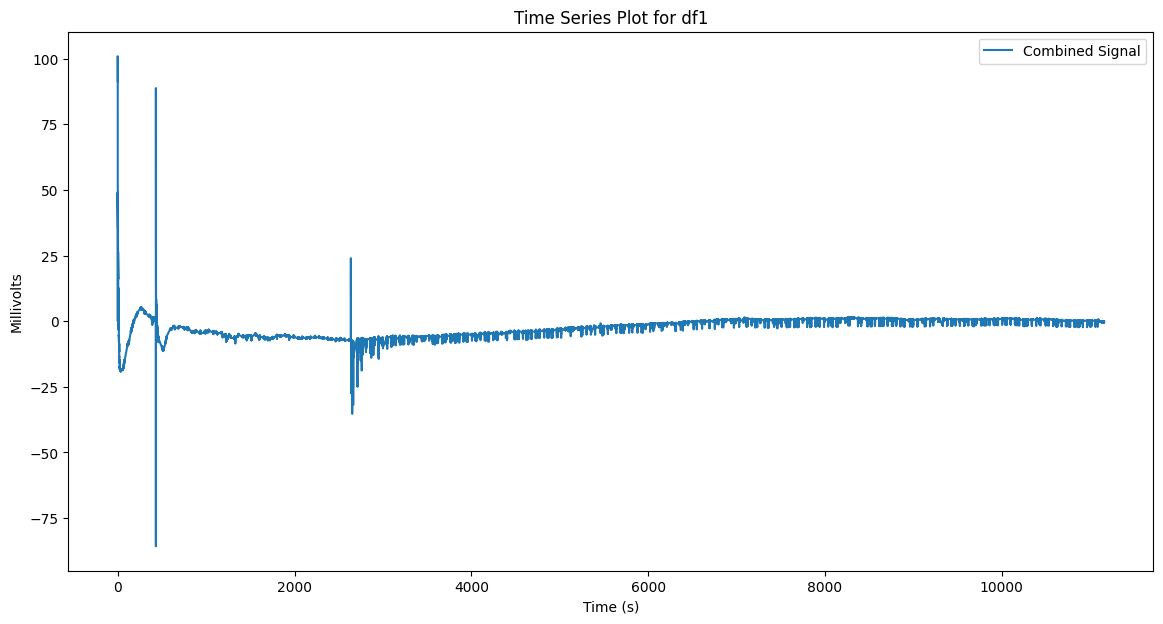

In [4]:
plot_time_series(df10, 'Time Series Plot for df1')
plot_time_series(df15, 'Time Series Plot for df20')

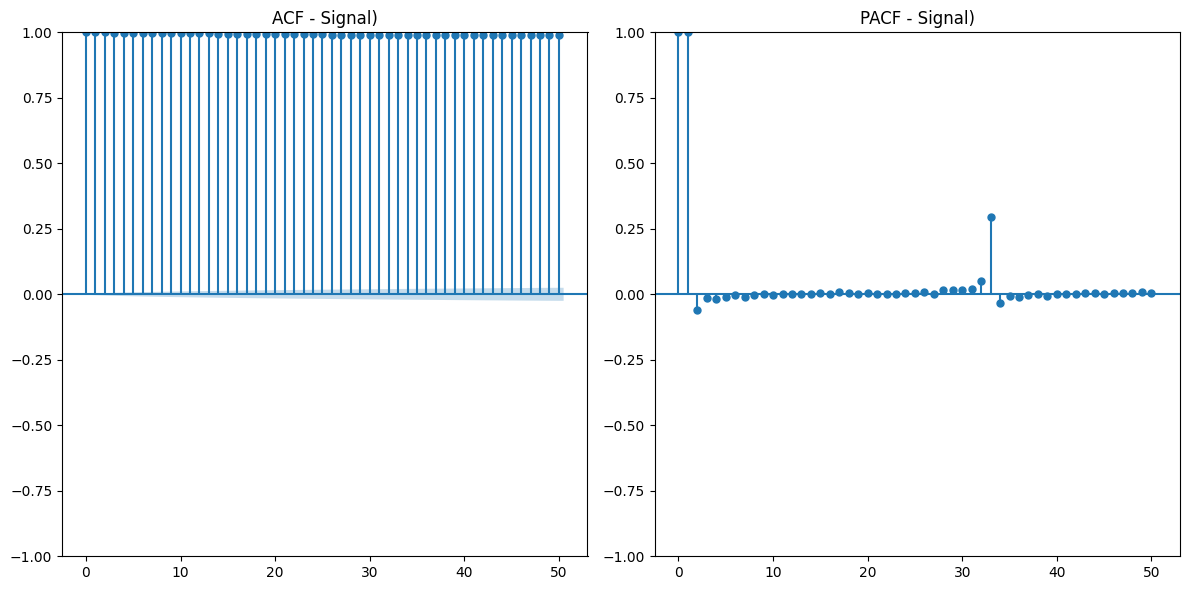

In [ ]:
#ACF e PACF
filtered_df1 = df1.loc[df1['y'] <= 0]
combined_signal = filtered_df1.drop(columns='y', errors='ignore').values.flatten()
downsampled_signal = downsample_signal(combined_signal, factor=10) 
plot_acf_pacf(downsampled_signal, 'Signal)')

In [ ]:
#check stationarity
stationarity_results_df1 = check_combined_stationarity_kpss(df1)
for key, value in stationarity_results_df1.items():
    print(f"{key}: {value}")

Test Statistic: 48.294028615659315
p-value: 0.01
Lags Used: 1724
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Stationarity: Non-stationary


c:\Users\stebi\Desktop\TESI\Thesis\Utils\stationarity.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(combined_signal, regression='c', nlags='auto')


In [ ]:
#filter out rows with y > 0
import pandas as pd

def filter_dataframes(num_dataframes):
    filtered_dataframes = {}
    
    for i in range(1, num_dataframes + 1):
        df_name = f'df{i}'
        df = globals().get(df_name)
        if df is not None:
            filtered_df = df[df['y'] <= 0]
            filtered_dataframes[df_name] = filtered_df

    return filtered_dataframes

filtered_dataframes = filter_dataframes(32)

### Windowing

In [ ]:
#windowing
processed_dataframes_6 = window(filtered_dataframes, 6)
processed_dataframes_12 = window(filtered_dataframes, 12)
processed_dataframes_18 = window(filtered_dataframes, 18)
processed_dataframes_24 = window(filtered_dataframes, 24)

### Normalization

In [ ]:
#normalization
normalized_dataframes_6 = normalize(processed_dataframes_6)
normalized_dataframes_12 = normalize(processed_dataframes_12)
normalized_dataframes_18 = normalize(processed_dataframes_18)
normalized_dataframes_1_day = normalize(processed_dataframes_24)

### Feature generation

In [ ]:
#featgen
extracted_features_6 = featgen(normalized_dataframes_6)
extracted_features_12 = featgen(normalized_dataframes_12)
extracted_features_18 = featgen(normalized_dataframes_18)
extracted_features_1_day = featgen(normalized_dataframes_1_day)

combined_features_6 = combined(extracted_features_6)
combined_features_12 = combined(extracted_features_12)
combined_features_18 = combined(extracted_features_18)
combined_features_1_day = combined(extracted_features_1_day)

### Scaling

In [ ]:
#scaling
scaled_dataframes_6 = scale(combined_features_6, target_column='y')
scaled_dataframes_12 = scale(combined_features_12, target_column='y')
scaled_dataframes_18 = scale(combined_features_18, target_column='y')
scaled_dataframes_1_day = scale(combined_features_1_day, target_column='y')


## Regression
### Define models

In [ ]:
#define models
models = {
    'XGB': XGBRegressor(),
    'ADAB': AdaBoostRegressor(),
    'LGBM': lgb.LGBMRegressor()
}

### Modelling, scaling and normalization

In [ ]:
#modelling, scal + norm
dictionaries = {
    '6_h_window': scaled_dataframes_6,
    '12_h_window': scaled_dataframes_12,
    '18_h_window': scaled_dataframes_18,
    '1_d_window': scaled_dataframes_1_day
}

results, individual_maes = regression(models, dictionaries)
pretty_print(results)

In [ ]:
#mean day pred
mean_days = compute_mean_day_of_prediction(individual_maes)
pretty_print_mean_days(mean_days)

In [ ]:
#boxplots
create_boxplots(individual_maes)

In [ ]:
#line plot
plot_lines(individual_maes)

### Modelling, only normalization

In [ ]:
#modelling,  only norm
dictionaries = {
    '6_h': combined_features_6,
    '12_h': combined_features_12,
    '18_h': combined_features_18,
    '1_d': combined_features_1_day
}

results, individual_maes = regression(models, dictionaries)
pretty_print(results)

In [ ]:
#mean day pred
mean_days = compute_mean_day_of_prediction(individual_maes)
pretty_print_mean_days(mean_days)

In [ ]:
#boxplot
create_boxplots(individual_maes)

In [ ]:
#line plot
plot_lines(individual_maes)

### Modelling, no scaling no normalization

In [ ]:
#featgen, original data no normalization
extracted_features_6 = featgen(processed_dataframes_6)
extracted_features_12 = featgen(processed_dataframes_12)
extracted_features_18 = featgen(processed_dataframes_18)
extracted_features_1_day = featgen(processed_dataframes_24)

combined_features_6 = combined(extracted_features_6)
combined_features_12 = combined(extracted_features_12)
combined_features_18 = combined(extracted_features_18)
combined_features_1_day = combined(extracted_features_1_day)

In [ ]:
#modelling, no scale no norm
dictionaries = {
    '6_h': combined_features_6,
    '12_h': combined_features_12,
    '18_h': combined_features_18,
    '1_d': combined_features_1_day
}

results, individual_maes = regression(models, dictionaries)
pretty_print(results)

In [ ]:
#mean day pred
mean_days = compute_mean_day_of_prediction(individual_maes)
pretty_print_mean_days(mean_days)

In [ ]:
#boxplot
create_boxplots(individual_maes)

In [ ]:
#line plot
plot_lines(individual_maes)

### Modelling, only scaling

In [ ]:
#scaling raw data
scaled_dataframes_6 = scale(combined_features_6, target_column='y')
scaled_dataframes_12 = scale(combined_features_12, target_column='y')
scaled_dataframes_18 = scale(combined_features_18, target_column='y')
scaled_dataframes_1_day = scale(combined_features_1_day, target_column='y')

In [ ]:
#modelling, only scale
dictionaries = {
    '6_h': scaled_dataframes_6,
    '12_h': scaled_dataframes_12,
    '18_h': scaled_dataframes_18,
    '1_d': scaled_dataframes_1_day
}

results, individual_maes = regression(models, dictionaries)
pretty_print(results)

In [ ]:
#mean day pred
mean_days = compute_mean_day_of_prediction(individual_maes)
pretty_print_mean_days(mean_days)

In [ ]:
#boxplot
create_boxplots(individual_maes)

In [ ]:
#line plot
plot_lines(individual_maes)
